# 2 - COMPUTER VISION - Combining Thresholds   

In [18]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

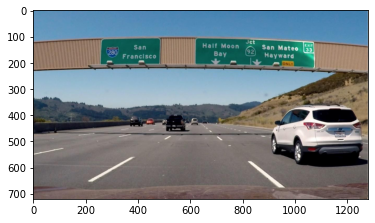

In [19]:
image = mpimg.imread('images/signs_vehicles_xygrad.png')
plt.imshow(image)

In [20]:
def abs_sobel_threshold(image, orient='x', sobel_kernel=3, thresh=(0, 255)):
    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    
    sobel = 0
    if orient == 'x':
        sobel = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=sobel_kernel)
    else:
        sobel = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=sobel_kernel)

    abs_sobel = np.absolute(sobel)

    scaled_sobel = np.uint8(255 * abs_sobel / np.max(abs_sobel))
    sobel_binary = np.zeros_like(scaled_sobel)
    sobel_binary[(scaled_sobel >= thresh[0]) & (scaled_sobel <= thresh[1])] = 1
    return sobel_binary

In [30]:
def magnitude_threshold(image, sobel_kernel=3, mag_thresh=(0, 255)):
    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    
    sobel_x = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=sobel_kernel)
    sobel_y = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=sobel_kernel)

    magnitude_sobel_xy = np.sqrt(sobel_x ** 2 + sobel_y ** 2)

    scaled_sobel = np.uint8(255*magnitude_sobel_xy / np.max(magnitude_sobel_xy))

    sobel_xy_binary = np.zeros_like(scaled_sobel)
    sobel_xy_binary[(scaled_sobel >= mag_thresh[0]) & (scaled_sobel <= mag_thresh[1])] = 1
    return sobel_xy_binary

In [31]:
def directional_threshold(image, sobel_kernel=3, thresh=(0, np.pi/2)):
    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    
    sobel_x = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=sobel_kernel)
    sobel_y = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=sobel_kernel)

    directional_gradient = np.arctan2(
        np.absolute(sobel_y), 
        np.absolute(sobel_x))

    directional_sobel_xy_binary = np.zeros_like(directional_gradient)
    directional_sobel_xy_binary[(directional_gradient >= thresh[0]) & (directional_gradient <= thresh[1])] = 1

    return directional_sobel_xy_binary

In [82]:
ksize = 15
thresholds = (30, 100)
magnitude_thresholds = (30, 100)
directional_thresholds = (0.7, 1.3)

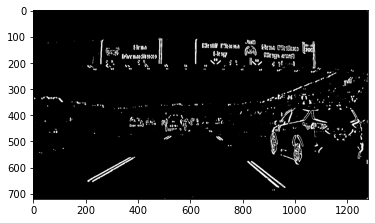

In [83]:
gradient_x = abs_sobel_threshold(image, orient='x', sobel_kernel=ksize, thresh=thresholds)
plt.imshow(gradient_x, cmap='gray')

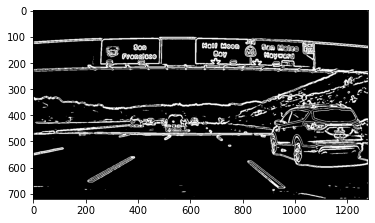

In [84]:
gradient_x = magnitude_threshold(image, sobel_kernel=ksize, mag_thresh=magnitude_thresholds)
plt.imshow(gradient_x, cmap='gray')

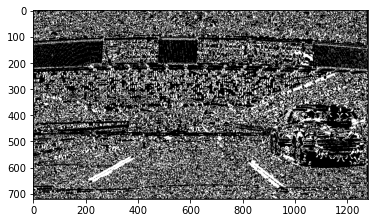

In [85]:
gradient_x = directional_threshold(image, sobel_kernel=ksize, thresh=directional_thresholds)
plt.imshow(gradient_x, cmap='gray')

In [94]:
# Apply each of the thresholding functions
grad_x = abs_sobel_threshold(image, orient='x', sobel_kernel=ksize, thresh=thresholds)
grad_y = abs_sobel_threshold(image, orient='y', sobel_kernel=ksize, thresh=thresholds)
mag_binary = magnitude_threshold(image, sobel_kernel=ksize, mag_thresh=magnitude_thresholds)
dir_binary = directional_threshold(image, sobel_kernel=ksize, thresh=directional_thresholds)

In [95]:
combined = np.zeros_like(dir_binary) 
combined[((grad_x == 1) & (grad_y == 1)) | ((mag_binary == 1) & (dir_binary == 1))] = 1

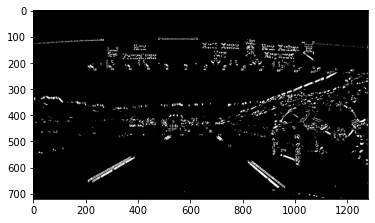

In [96]:
plt.imshow(combined, cmap='gray')